In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import r2_score

In [22]:
house_price=pd.read_csv('Bangalore.csv')

In [33]:
house_price.head()     

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [34]:
house_price.rename(columns={'No. of Bedrooms':'Bedrooms'},inplace=True)

In [35]:
house_price_train, house_price_test=train_test_split(house_price,test_size=0.2,random_state=47)

In [36]:
house_price_train.describe()

,Price,Area,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,4.965000e+03,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,...,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000
mean,1.054205e+07,1522.798389,2.558912,0.079960,6.229607,6.478751,6.453172,6.401007,6.415509,6.390735,...,6.455388,6.230010,6.331319,6.229406,6.201007,6.229406,6.229406,6.229406,6.190332,6.229406
std,1.369193e+07,747.280401,0.689512,0.271258,4.116755,3.745667,3.786197,3.867013,3.844788,3.882645,...,3.782710,4.116194,3.971341,4.117035,4.156279,4.117035,4.117035,4.117035,4.170885,4.117035
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.400000e+06,1338.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.080000e+07,1660.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


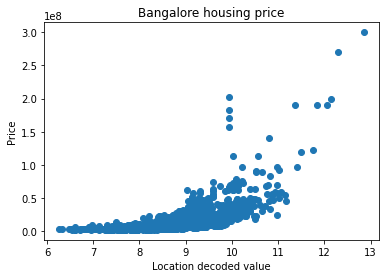

In [37]:
K=np.log(house_price_train['Price']/house_price_train['Area'])

plt.plot(K,house_price_train['Price'],'o')
plt.xlabel('Location decoded value')
plt.ylabel('Price')
plt.title('Bangalore housing price')
plt.show()

In [38]:
matrix_corr=house_price_train.corr()
matrix_corr['Price']  

Price                  1.000000
Area                   0.397143
Bedrooms               0.235537
Resale                -0.042893
MaintenanceStaff       0.033609
Gymnasium              0.035335
SwimmingPool           0.037890
LandscapedGardens      0.033338
JoggingTrack           0.038366
RainWaterHarvesting    0.036764
IndoorGames            0.037229
ShoppingMall           0.032634
Intercom               0.034270
SportsFacility         0.039681
ATM                    0.033293
ClubHouse              0.039482
School                 0.032154
24X7Security           0.036502
PowerBackup            0.034424
CarParking             0.038602
StaffQuarter           0.034976
Cafeteria              0.034760
MultipurposeRoom       0.033996
Hospital               0.033252
WashingMachine         0.037073
Gasconnection          0.037523
AC                     0.037122
Wifi                   0.033707
Children'splayarea     0.035585
LiftAvailable          0.032593
BED                    0.037150
VaastuCo

In [39]:
def na_remover(data):
    data.replace(9,0.5,inplace=True)

In [40]:
def data_processing(data):
    K=np.log(data['Price']/data['Area'])
    data['Location']=K
    house_feature=data.drop(['Price'],axis=1)
    my_pipeline=Pipeline([('rem',na_remover(house_feature)),
                          ('std',StandardScaler())   
                         ])
    return my_pipeline.fit_transform(house_feature)

In [41]:
Y_train=np.log(house_price_train['Price'])
X_train=data_processing(house_price_train)

<ipython-input-40-4413df406079>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location']=K


In [42]:
X_train.shape


(4965, 39)

## Different model training 

In [43]:
model1=LinearRegression().fit(X_train,Y_train)   

In [44]:
model2=Ridge().fit(X_train,Y_train)  

In [45]:
model3=DecisionTreeRegressor().fit(X_train,Y_train)    

In [46]:
model4=RandomForestRegressor().fit(X_train,Y_train)     

In [47]:
model1_predict=model1.predict(X_train)
model2_predict=model2.predict(X_train)
model3_predict=model3.predict(X_train)
model4_predict=model4.predict(X_train)

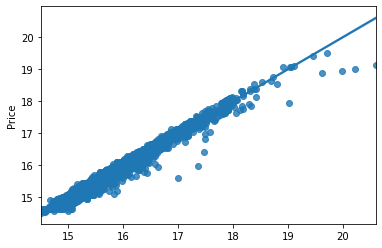

In [48]:
sns.regplot(model1_predict,Y_train)

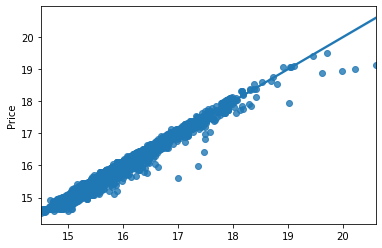

In [49]:
sns.regplot(model2_predict,Y_train)

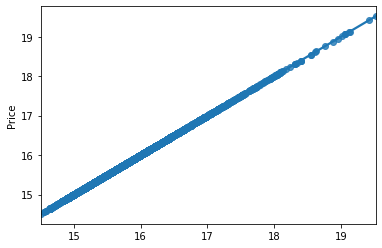

In [50]:
sns.regplot(model3_predict,Y_train)

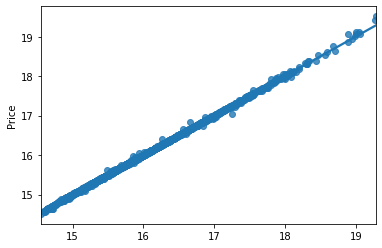

In [51]:
sns.regplot(model4_predict,Y_train)

## testing

In [52]:
Y_test=house_price_test['Price']


In [53]:
X_test=data_processing(house_price_test)

<ipython-input-40-4413df406079>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location']=K


In [54]:
model1_test=np.exp(model1.predict(X_test))
model2_test=np.exp(model2.predict(X_test))
model3_test=np.exp(model3.predict(X_test))
model4_test=np.exp(model4.predict(X_test))

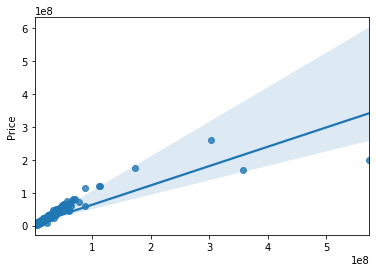

In [55]:
sns.regplot(model1_test,Y_test)

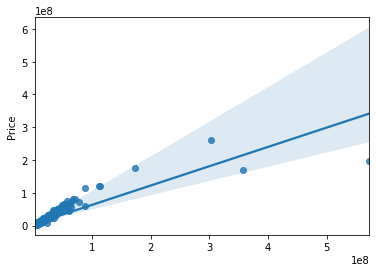

In [56]:
sns.regplot(model2_test,Y_test)

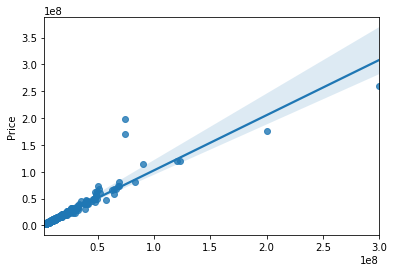

In [57]:
sns.regplot(model3_test,Y_test)

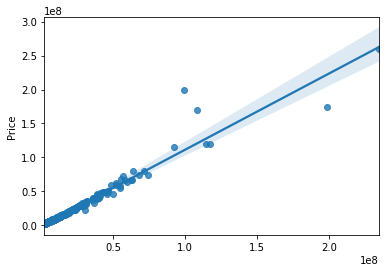

In [58]:
sns.regplot(model4_test,Y_test)

In [59]:
model1_r2=r2_score(model1_test,Y_test)

model2_r2=r2_score(model2_test,Y_test)

model3_r2=r2_score(model3_test,Y_test)

model4_r2=r2_score(model4_test,Y_test)

In [60]:
print("model1_error:{}\nmodel2_error:{}\nmodel3_error:{}\nmodel4_error:{}".format(model1_r2,model2_r2,model3_r2,model4_r2))

model1_error:0.7304596707330325
model2_error:0.7307650182599637
model3_error:0.8826984080875863
model4_error:0.9246496770775795


## model exporting

In [62]:
import joblib as jb

In [64]:
jb.dump(model4,'bangalore_house_price')

['bangalore_house_price']